In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
import torchvision
import torch

## First training try on shopFacade, 100 epochs

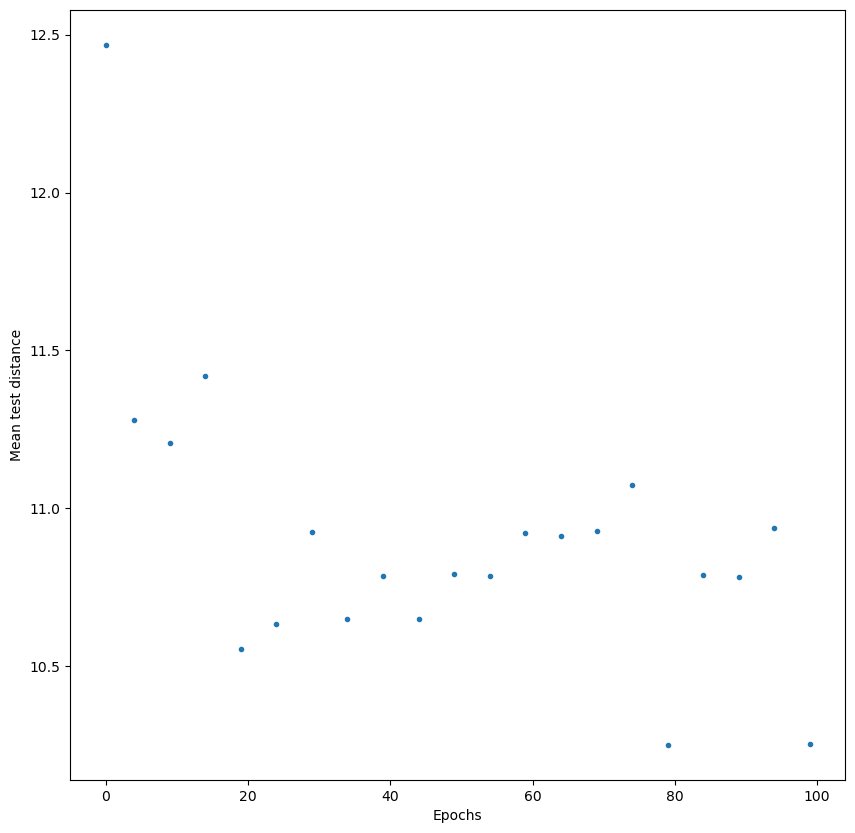

In [16]:
testErr = []
epochs = []

for file in os.listdir("./ShopFacade/run-22-09-14/"):
    if file.startswith("test_"):
        test = np.loadtxt("./ShopFacade/run-22-09-14/"+file)
        e = int((file.split("epoch")[-1]).split(".")[0])
        epochs.append(e)
        testErr.append(test.mean())

plt.figure(figsize=(10,10))

plt.plot(epochs, testErr, ls="", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Mean test distance")
plt.show()

## Translation vectors for different kaggle training sets

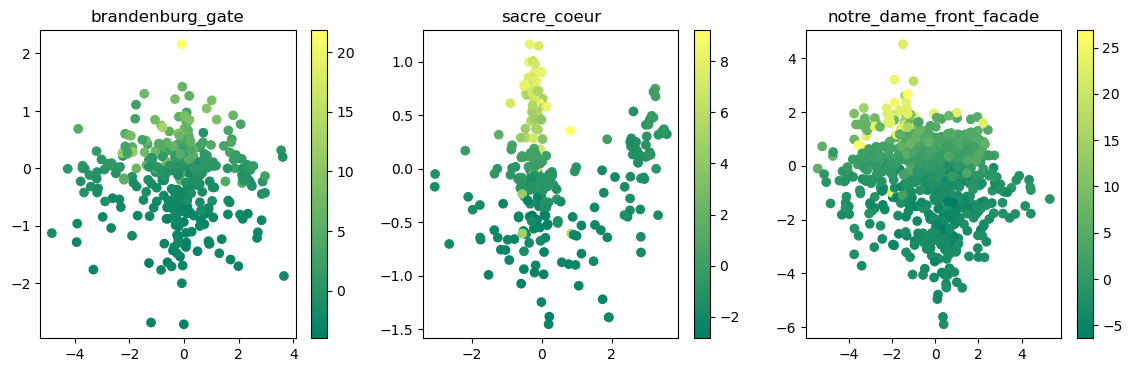

In [39]:
trainSets = ["./kaggle-data/train/brandenburg_gate/calibration.csv", "./kaggle-data/train/sacre_coeur/calibration.csv", "./kaggle-data/train/notre_dame_front_facade/calibration.csv"]
fig1, ax1 = plt.subplots(1,3, figsize=(14,4))

for j, file in enumerate(trainSets):
    calibFile = np.loadtxt(file, dtype = str, skiprows=1, delimiter=",")
    translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)

    k = ax1[j].scatter(translations[:,0],translations[:,1], c=translations[:,2], cmap="summer")
    ax1[j].set_title(file.split("/")[3])

    plt.colorbar(k, ax=ax1[j])

plt.show()

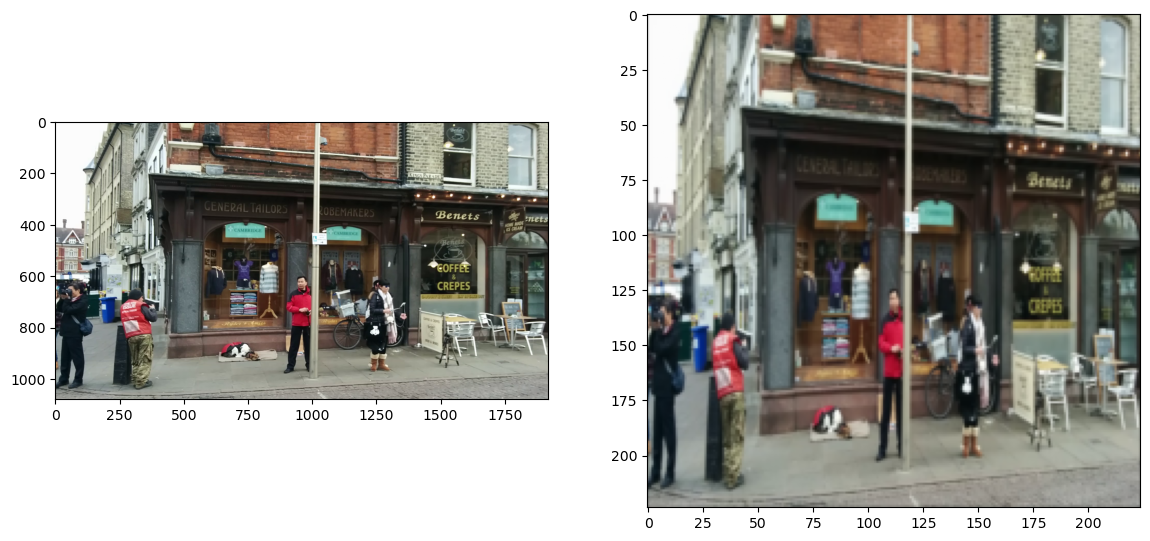

In [47]:
orig = io.imread("./ShopFacade/seq1/frame00001.png")

trans = transform.resize(orig, (224,224), mode="constant")

fig2, ax2 = plt.subplots(1,2, figsize=(14, 7))

ax2[0].imshow(orig)
ax2[1].imshow(trans)

plt.show()